#주피터 노트북 모드 2개
#1.에디터모드 : 커서 깜박일때 ,편집모드 
#2.command mode :에디터모드에서 esc ->m누르면 마크다운 으로 바꿈
#3. 다시esc -> y 누르면 파이썬 모드

## 01 서울시 구별 CCTV 현황 분석

[학습목표]
- 서울시 구별 CCTV 수 파악, 인구대비 CCTV 비율 파악해석 순위 비교

In [2]:
# 데이터 처리 임포트
import pandas as pd
import numpy as np


In [3]:
# 데이터 파일(CSV)을  읽어서 데이터 프레임 생성
CCTV_Seoul = pd.read_csv(
    '../data/01. CCTV_in_Seoul.csv'
    # ,encoding='uft-8'  -> 안해도 디폴트가 utf-8
)
CCTV_Seoul.head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# 컬럼: 기관명 => 구별 변경
# 컬럼명들을 확인
CCTV_Seoul.columns # 결과: 리스트X , ndarray

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
# CCTV_Seoul.columns[0] ='구별' # mutable error뜸
# 컬럼명 변경하는 메소드:rename

CCTV_Seoul.rename(
    columns={CCTV_Seoul.columns[0]:'구별'}
    # inplace = False # 원보수정 X (default=false가 디폴트)
    ,inplace = True # 원보수정 X (default=false가 디폴트)
)
#mappe: 키/ 밸류 ->딕셔너리다~~

CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
# 인구데이터(엑셀파일=xls) 읽어서 데이터프레임 생성
POP_Seoul = pd.read_excel( # <주의> 엑셀파일 너무 크면 엑셀프로그램으로 열면 X
    '../data/01. population_in_Seoul.xls'
    ,header=2 # index 2부터 가져와라~
    ,usecols = 'B,D,G,J,N' # 필요한 칼럼들만 가져옴~ 
)
POP_Seoul.head() # read 하면 -> 다, dataframe 생성
# 테이블에서 뺄껀 빼야함 : 한국인(남,여) => 계 / 등록외국인(남,여)도 =>계

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [7]:
# 컬럼명 변경: rename
POP_Seoul.rename(columns={
    POP_Seoul.columns[0] : '구별', 
    POP_Seoul.columns[1] : '인구수', 
    POP_Seoul.columns[2] : '한국인', 
    POP_Seoul.columns[3] : '외국인', 
    POP_Seoul.columns[4] : '고령자'
},  inplace = True)
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
print(CCTV_Seoul.head())
POP_Seoul.head() # 두테이별 연결해야함 key = "구별" 로~~~

    구별    소계  2013년도 이전  2014년  2015년  2016년
0  강남구  2780       1292    430    584    932
1  강동구   773        379     99    155    377
2  강북구   748        369    120    138    204
3  강서구   884        388    258    184     81
4  관악구  1496        846    260    390    613


,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 4.CCTV 데이터 파악하기
# 정렬 : DF.sort_values(by = '컬럼명') CCTV적은 구 조회
CCTV_Seoul.sort_values(by="소계",ascending=True).head()  # 어떤 그래프로 보여질지 목표파악하고 정렬하기
#작은것들 5개만 뽑기


,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [10]:
# CCTV 많은 구
CCTV_Seoul.sort_values('소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [11]:
# 최근 3년간 증가율 구하자
# <수식>  (16+15+14) / 13 * 100 => 증가율
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년']) / \
    CCTV_Seoul['2013년도 이전']*100
    # / 다음에 \(역슬래시) 써야 오류 안남

CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [12]:
#합계 행을 삭제(drop) , 있으면 그래프 망가짐
POP_Seoul.drop(
    [0],
    axis=0, 
    inplace=True # axis=0,inplace=False 는 디폴트다 
)
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [13]:
#구가 키로 사용되었기 때문에 구의 중복여부확인,엑셀파일은 파지막 행에 Nan 있을 수 있다.
POP_Seoul['구별'].unique

<bound method Series.unique of 1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object>

In [14]:
POP_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [15]:
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
#NaN Row drop
POP_Seoul.drop([26],inplace=True)
POP_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [17]:
# 외국인, 고령자 비율추가(컬럼)
POP_Seoul['외국인비율'] = POP_Seoul['외국인'] / POP_Seoul['인구수']*100
POP_Seoul['고령자비율'] = POP_Seoul['고령자'] / POP_Seoul['인구수']*100
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
#인구수 정렬
POP_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
#외국인수 정렬
POP_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [20]:
# 외국인 비율
POP_Seoul.sort_values(by="외국인비율",ascending=True).head(10)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794


In [21]:
#고령자 수 정렬
POP_Seoul.sort_values(by='고령자',ascending=False).head(15)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
20,동작구,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251


In [22]:
#고령자 비율
POP_Seoul.sort_values(by='고령자비율',ascending=False).head(20)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885


In [23]:
#6. 병합
data_result = pd.merge(
    CCTV_Seoul,
    POP_Seoul,
    on='구별'
    
)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
data_result.info()
#RangeIndex: 25 entries, 0 to 24 : 25개구


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구별         25 non-null     object 
 1   소계         25 non-null     int64  
 2   2013년도 이전  25 non-null     int64  
 3   2014년      25 non-null     int64  
 4   2015년      25 non-null     int64  
 5   2016년      25 non-null     int64  
 6   최근증가율      25 non-null     float64
 7   인구수        25 non-null     float64
 8   한국인        25 non-null     float64
 9   외국인        25 non-null     float64
 10  고령자        25 non-null     float64
 11  외국인비율      25 non-null     float64
 12  고령자비율      25 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.7+ KB


In [25]:
# 컬럼(Series object)삭제
#drop:여러개 한번삭제
#del:한 열씩 삭제 , 원본값 직접 수정
# del data_result['2013년도 이전']
# del data_result['2014년']
# del data_result['2015년']
# del data_result['2016년']

data_result.head()

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']


In [36]:
# 구별이라는 컬럼을 인덱스(키)로 보낸댜.
data_result.set_index('구별', inplace=True) # inplace = True -> 하게되면 return None
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [27]:
# 다른 컬럼들(외국인비율,고령자 비율)들이 CCTV 개수 어떤 영향을 미치는가? , 상관관계 확인
np.corrcoef(data_result['고령자비율'],data_result['소계'])
#결과: 고령자 비율이 늘면 CCTV개수는 줄어든다......../ but 큰관련 X




array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [28]:
# 다른 컬럼들(외국인비율,고령자 비율)들이 CCTV 개수 어떤 영향을 미치는가? , 상관관계 확인
np.corrcoef(data_result['외국인비율'],data_result['소계'])
#결과: 고령자 비율이 늘면 CCTV개수는 줄어든다........


array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [29]:
# 다른 컬럼들(외국인비율,고령자 비율)들이 CCTV 개수 어떤 영향을 미치는가? , 상관관계 확인
np.corrcoef(data_result['인구수'],data_result['소계'])
#결과: 고령자 비율이 늘면 CCTV개수는 줄어든다........
# 0.3정도 나오면 관계가 있다.
# 즉, 인구수 대비 관계가 있다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [ ]:
# 정렬파악: CCTV 개수(소계), 최종결과물
data_result.sort_values(by="소계", ascending=False).head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
18,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
14,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
21,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
20,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [31]:
#.8그래프 그리기 기초-matplotlib:데이터 시각화의 모든것
#사이트 : matplotlib.org, 공식문서니까 따라하는게 좋음~~/ 
# 책보다 더 좋은 공식문서임~~같은파일에 첨부자료 있음


#### Matplotlib 작동순서
-1. Figure전체그림판 \
-2. Axes(좌표축 영역) \
-3. 데이터그리기

In [38]:
# 9 CCTV외 인구현황 그래프 분석:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


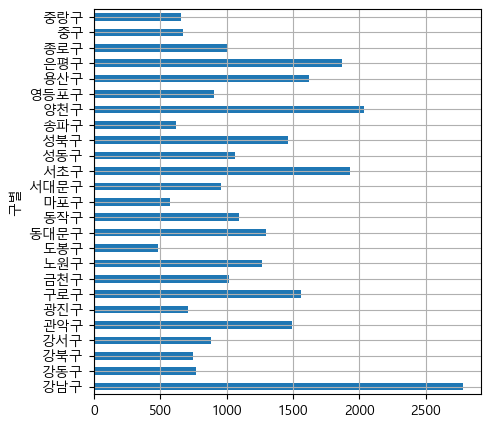

In [47]:
# 그래프: 데이터프레임에서 차트 시각화
# CCTV 개수(소계)를 막대그래프로 시각화
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure()
data_result['소계'].plot(
    # kind = 'bar',   #일반막대 차트의 종류를 선택
    kind = 'barh',    #수평막대 차트의 종류를 선택
    figsize  = (5,5),
    grid = True  
    
    ) # 결과: 시리즈 with index
plt.show()

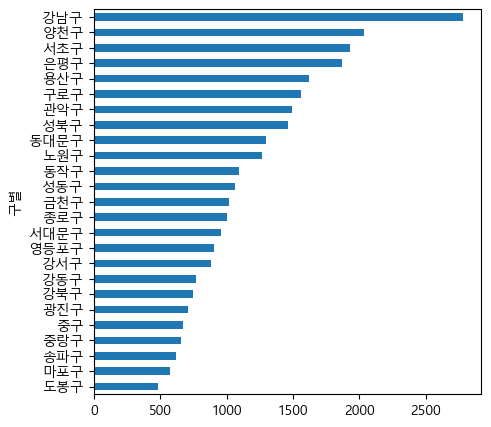

In [49]:
# 정렬은 내가하리? 소리 안듣기 위해서
data_result['소계'].sort_values().plot(
    kind = 'barh',
    figsize = (5,5)
    
    
)
plt.show()

In [59]:
# CCTV 비율 = 소계 / 인구수 * 100
data_result['CCTV 비율'] = data_result['소계']/data_result['인구수'] *100
data_result.head()

data_result['CCTV비율'].sort_values().plot(
    kind = 'barh',
    figsize = (5,5)
)


KeyError: 'CCTV비율'

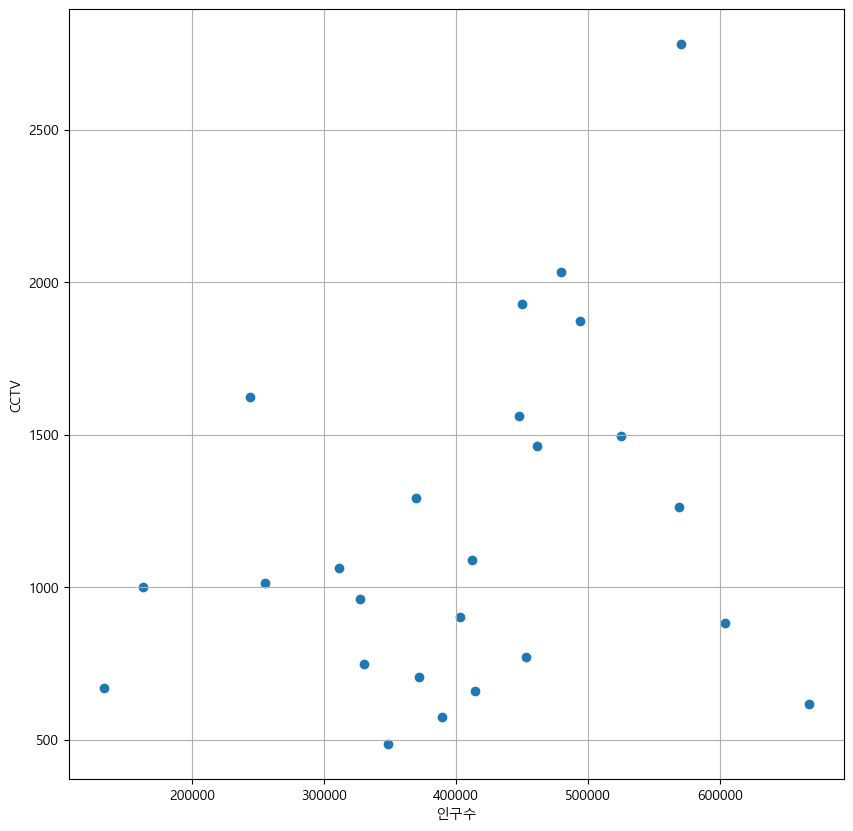

In [83]:
# 소계와 인구수의 관계
# 산정도로 확인
plt.figure(figsize=(10,10))
plt.scatter(
    data_result['인구수'], #x축
    data_result['소계']    #y축
)

plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

# 아~ 인구수가 늘면 CCTV도 늘어가는구나 까지는 확인
# 근데 얼마큼 늘어나는지도 확인해보자~~~다음 ㄱㄱ

In [76]:
# 그래프 추가해야함 -> 기울기 알기 위해서
# 데이터를 대표하는 직선 표시(CCTV와 인구수는 양의 상관관계)
# a,b 구하기: 계수 구하기 => polyfit()
# 방정식(다항식) 생성: ploy1d()
# 1.계수 (a,b)
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1) #np.ployfit(data1,data2, 차수)
# 1차방정식 구해라~~
# 결과: [1.30916415e-03 6.45066497e+02] = > [기울기, y절편]
print(fp1)

# 2. 식 생성
f1 = np.poly1d(fp1)
f1

[1.30916415e-03 6.45066497e+02]


poly1d([1.30916415e-03, 6.45066497e+02])

In [ ]:
# 인구수 처리하는 데이터 생성
fx = np.linspace(100000, 700000, 100) # 십만~7십만까지 구간 100개 나누어라
#함수에 들어갈 X값 구하기
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

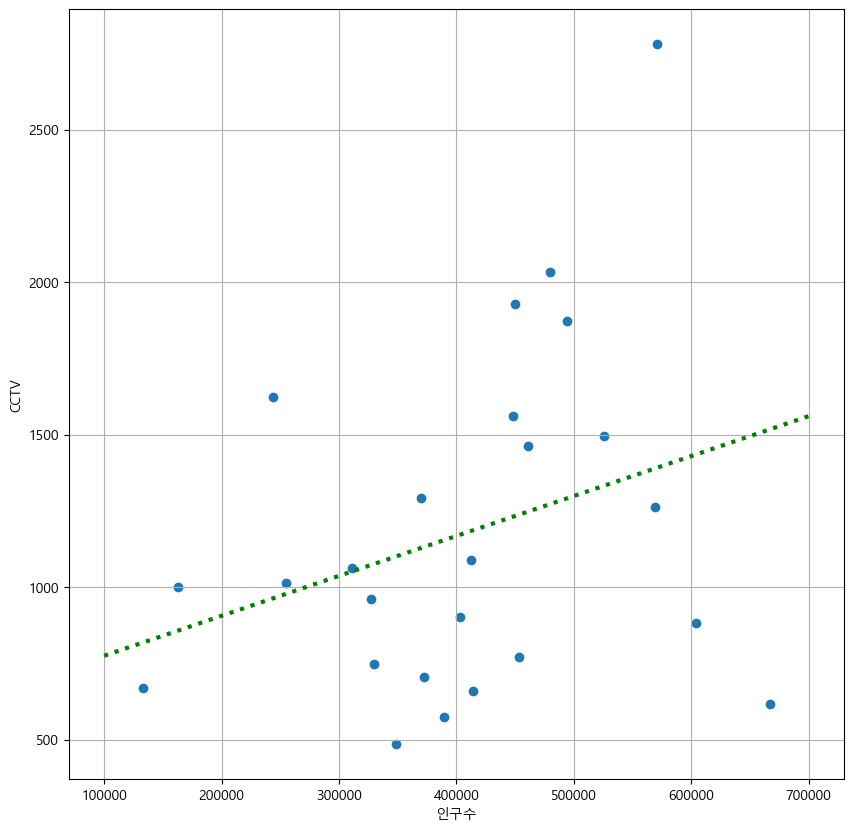

In [86]:
# 산정도로 확인
plt.figure(figsize=(10,10))
plt.scatter(
    data_result['인구수'], #x축
    data_result['소계']    #y축
)
# plt.plot( # 산점도 위에 직선표시 , 직선근처에 있어야 오차가가 없음
#     fx,
#     f1(fx),
    
# )

plt.plot(fx,f1(fx), ls='dotted', lw=3, color='g') # dotted: 점선, solid: 실선 , dashed: 

plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

In [ ]:
# 직선에서 많이 떨어진 오차들에 대해 어느 '구' 인이 표시해야함
# 10.조금 더 설득력 있는 자료 만들기~~~
# 즉, 오차를 잘 다뤄보자~~
data_result['오차'] =np.abs(data_result['소계'] - f1(data_result['인구수'])) # 오차에-부호나오면 안되서

data_result.head() # 맨 마지막 열에 '오차'나옴

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [105]:
# 오차로 정렬 확인
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()#오차가 많은 구 5개를 확인

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


C:\Users\TJ\AppData\Local\Temp\ipykernel_4128\3495154853.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort['인구수'][n]*1.02,# x축의 위치(인구수값) * 1.02
C:\Users\TJ\AppData\Local\Temp\ipykernel_4128\3495154853.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort['소계'][n]*0.98,# Y축의 위치(소계값) * 0.98


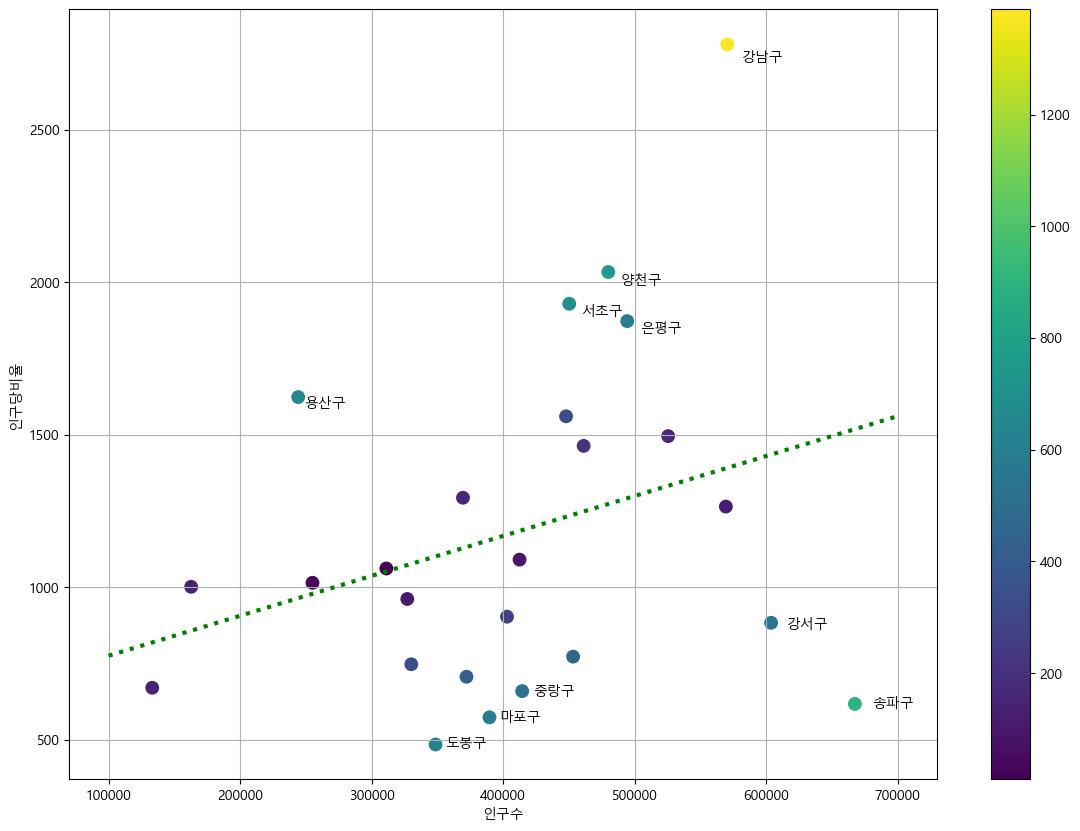

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize =(14,10))
# 선정도 출력
plt.scatter(
    data_result['인구수'], data_result['소계'], c=data_result['오차'], s =80 # 오차 큰 애들은 색깔 바뀜
)

plt.plot(fx, f1(fx), ls='dotted', lw=3 , color = 'g')
for n in  range(10): #10번 반복해 구명 출력
    plt.text(# 점에 겹치에 글씨가 있으면 안되니까~~
        df_sort['인구수'][n]*1.02,# x축의 위치(인구수값) * 1.02 
        df_sort['소계'][n]*0.98,# Y축의 위치(소계값) * 0.98        
        df_sort.index[n] # n=0 => '강남구'
        
    )
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar() # color:오차의 값 , 글씨깨진거는 unicode 
plt.grid()
plt.show() 

